## Imports

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import os
%matplotlib inline

# Stage 2

## Task 1

Compare the weekly statistics (Mean, Median, Mode) for cases and deaths across the US.

In [74]:
super_covid = pd.read_csv('./data/super_covid_data.csv')
covid_cases = pd.read_csv('./data/covid_confirmed_usafacts.csv')
covid_deaths = pd.read_csv('./data/covid_deaths_usafacts.csv')

# It will be easier to handle these separately so I'm importing the deaths and cases CSVs again.

# Create a dataframe I actually want to manipulate
cd_date = covid_deaths.drop(covid_deaths.columns[[0, 1, 2, 3]], axis=1, inplace=False)

#Transpose
cd_date = cd_date.transpose()

# Rename the columns after the countyFIPS so that I can merge later.
cd_date.columns = covid_deaths['countyFIPS']

# Change the index to a date and time so that I can resample it.
cd_date.index = pd.to_datetime(cd_date.index)

#Repeat this process for Cases
cc_date = covid_cases.drop(covid_cases.columns[[0, 1, 2, 3]], axis=1, inplace=False)
cc_date = cc_date.transpose()
cc_date.columns = covid_cases['countyFIPS']
cc_date.index = pd.to_datetime(cc_date.index)

start_date = pd.to_datetime('2020-06-01')  #Selecting the start and ending dates
end_date = pd.to_datetime('2021-01-03')

cd_date = cd_date.T
cd_date = cd_date[[col for col in cd_date.columns if start_date <= col <= end_date]]

cc_date = cc_date.T
cc_date = cc_date[[col for col in cc_date.columns if start_date <= col <= end_date]]

cd_last_date = cd_date.iloc[:, -1:]
cd_date = cd_date.loc[:, ::7]
cd_date = pd.concat([cd_date, cd_last_date], axis=1)  #Selecting columns from dataframe to use, ensuring that it will be weekly data with 2021-01-03 included
cd_date

,2020-06-01,2020-06-08,2020-06-15,2020-06-22,2020-06-29,2020-07-06,2020-07-13,2020-07-20,2020-07-27,2020-08-03,...,2020-11-02,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-03
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,5,5,6,9,12,13,16,21,21,21,...,30,30,36,39,41,41,41,44,47,50
1003,9,9,9,9,10,10,12,15,18,24,...,71,83,84,84,98,138,141,147,152,169
1005,1,1,1,1,1,2,2,4,4,5,...,9,9,9,10,11,29,30,32,32,33
1007,1,1,1,1,1,1,1,2,2,3,...,15,16,17,17,17,39,39,42,42,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0,0,0,0,0,0,0,2,2,2,...,2,4,4,6,6,11,14,15,15,16
56039,1,1,1,1,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,3,4
56041,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,4,6,7,7,7,7


## Total deaths across the U.S. Graph generation

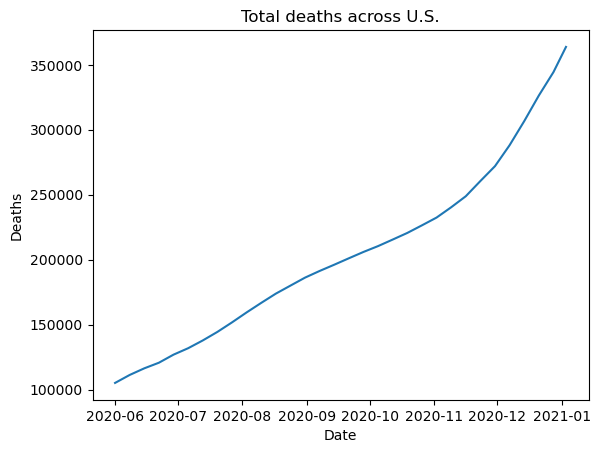

In [76]:
cd_date_total = cd_date.T.sum(axis=1)
plt.plot(cd_date_total)
plt.title('Total deaths across U.S.')  #Graph formatting
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

## Total cases across the U.S. Graph generation

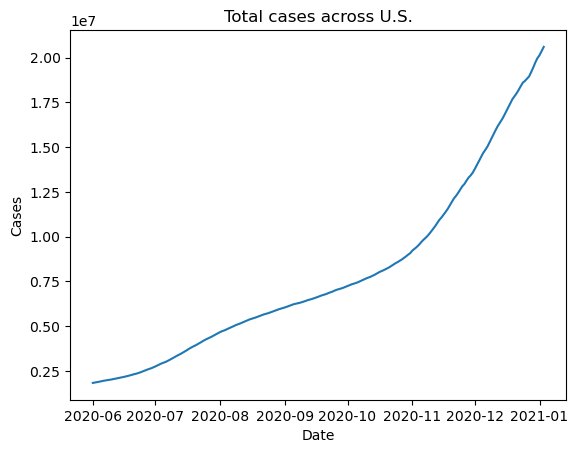

In [78]:
cc_date_total = cc_date.T.sum(axis=1)
plt.plot(cc_date_total)
plt.title('Total cases across U.S.')  #Graph detailing
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

## Average deaths across the U.S. Graph generation

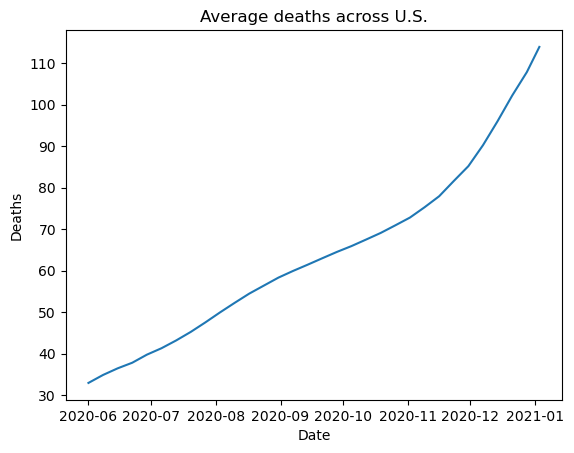

In [80]:
cd_date_mean = cd_date.T.mean(axis=1)
plt.plot(cd_date_mean)
plt.title('Average deaths across U.S.') #Graph detailing
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

## Average cases across the U.S Graph generation

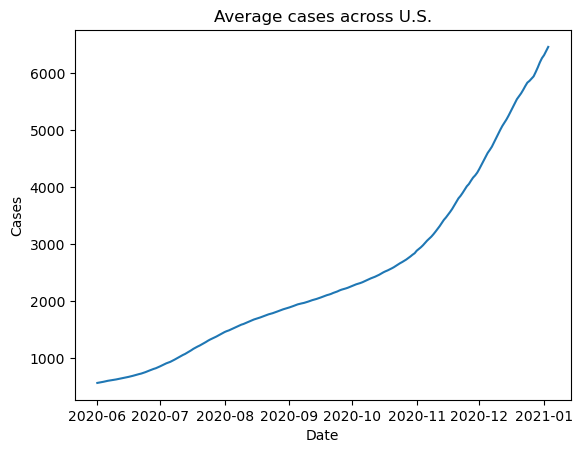

In [82]:
cc_date_mean = cc_date.T.mean(axis=1)
plt.plot(cc_date_mean)
plt.title('Average cases across U.S.') #Graph detailing
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

# Widening the scope to examine case and death totals in other countries.
Importing base data from csv.

In [84]:
world_covid_deaths = pd.read_csv('./data/world_covid_deaths.csv')
world_covid_deaths

FileNotFoundError: [Errno 2] No such file or directory: 'world_covid_deaths.csv'

## Comparingn U.S. data with other countires.
### While looking for other countries of a similar caliber to the U.S, we selected Germany, Mexico, Canada, Australia, and India.
These countries are massive and did pretty good reporting on their covid cases + deaths, but have enough of a difference between them to make for interesting data comparison.

In [ ]:
countries = ['Germany', 'Mexico', 'Canada', 'Australia', 'India']  #Selecting countries to be used from dataset

country_dfs = []
for country in countries:
    country_df = world_covid_deaths[world_covid_deaths['Entity'] == country].reset_index(drop=True)
    country_df.drop(labels=['Code', 'Entity'], axis=1, inplace=True)
    country_df.set_index('Day', inplace=True)
    country_df.rename(columns={'Weekly deaths': country}, inplace=True)
    country_df = country_df.T
    country_dfs.append(country_df)


### Reducing the data time frame to 2020-06-01 - 2021-01-03, as outlined.

In [ ]:
all_countries = pd.concat(country_dfs, axis=0)
start_date = pd.to_datetime('2020-06-01')  #Start and ending dates
end_date = pd.to_datetime('2021-01-03')
all_countries.columns = pd.to_datetime(all_countries.columns)
all_countries_date_range = all_countries[[col for col in all_countries.columns if col <= end_date]]

### Reducing the data to it's final form, all 5 countries' data within the outlined range.

In [ ]:
last_date = all_countries_date_range.iloc[:, -1:]
weekly = all_countries_date_range.iloc[:, 3::7]  #Weekly reporting numbers, with the final date included

final = pd.concat([weekly, last_date], axis=1)  #Combinging the weekly and late late dataframes.
cumulative_deaths = final.cumsum(axis='columns')
cumulative_deaths = cumulative_deaths[[col for col in cumulative_deaths.columns if start_date <= col]]
cumulative_deaths

### Calculating the cumulative total from the U.S.

In [ ]:
america = cd_date_total
america.rename('America', inplace=True)

### Comparing U.S. total with other countries'
First, combining the total from the U.S. with the total from other countries. Then normalizing the data before displaying it as a graph.

In [ ]:
world_countries_deaths_compare = pd.concat([cumulative_deaths, america.to_frame().T])

In [ ]:
country_pops = {
    'Germany': 83.16e6,
    'Mexico': 126e6,
    'Canada': 38.01e6,
    'Australia': 25.65e6,   #Adding in each countries' populations
    'India': 1.396e9,
    'America': 329.5e6
}

norm = 100_000  #Normalization value
normalized_data = pd.DataFrame()
for country, pop in country_pops.items():
    normalized_data[country] = np.log10(world_countries_deaths_compare.T[country].div(pop) * norm)  #Normalizing the data for the graph
normalized_data.plot()

## As we can see, all countries had an increase in cases over the 7 month window.
### Some noticable peak weeks were during 2020-08 to 2020-09 and almost every country (save Australia) saw a pretty sizable increase between 2020-11 and 2021-01, which surely continued to climb.

#### This increase between 2020-11 to 2021-01 can easily be attributed to cold weather and holiday travel, especially since it seems to have impacted countries in the Northern Hemisphere the most.
This graph taken from the Bureau of Transportation Statistics show the increasing amount of passengers on flights through and within the US from 2018 to 2021. While the volume of people flying had not yet returned to pre-pandemic levels, there is an increase in travel across all of 2020, which would lead to higher rates of exposure.


In [ ]:
img = mping.imread('./data/Air Traffic Figure 1 Jan2021.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# What caused the 2020-08 spike in Australia?
#### While Australia had been doing a good job enforcing quarentine, another massive wave of infections occured in Victoria, sourced from an outbreak at a quarentine hotel in Melbourne, Victora. This second wave lasted from roughly June to October, where numbers gradually decreased into the flat line we see at the top of the curve.

### Some final date on the total death counts in every country.

In [ ]:
largest_values = world_countries_deaths_compare.max(axis=1)
largest_indices = world_countries_deaths_compare.idxmax(axis=1) #Compares the largest values and indices when looking at the compiled data from all used countries.

mostdeaths = pd.DataFrame({
    'Death Count': largest_values,
    'Day': largest_indices
})

mostdeaths